<a href="https://colab.research.google.com/github/KaggleStudy4th/4th_kaggle_study/blob/main/%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C/20%EC%A3%BC%EC%B0%A8/DNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mnist_softmax_SGD

In [1]:
import torch
import torchvision.datasets as data
import torchvision.transforms as transforms
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [3]:
learning_rate=0.001
training_epochs=15
batch_size=100

In [5]:
#저장경로 학습/테스트 데이터 선택 : true 학습 데이터 transform:download:

mnist_train=data.MNIST(root='MNIST_data/',
                       train=True,
                       transform=transforms.ToTensor(),
                       download=True)

mnist_test=data.MNIST(root='MNIST_data/',
                      train=False,
                      transform=transforms.ToTensor(),
                      download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [7]:
data_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        drop_last=True)

In [8]:
linear=torch.nn.Linear(784,10,bias=True)

In [9]:
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[-0.1953, -0.4404,  0.0139,  ...,  0.7510,  1.5190,  0.9637],
        [ 0.4146, -1.0660, -0.9969,  ..., -0.3259, -0.2695, -1.3316],
        [ 0.2600, -1.1821,  0.0065,  ...,  1.0648, -1.2251,  0.9841],
        ...,
        [ 0.0279, -1.7242, -1.1723,  ...,  1.3651, -0.0689, -0.7931],
        [ 0.0952,  0.1939,  0.1636,  ..., -1.0489,  0.6224, -1.7181],
        [ 2.6504,  0.6297, -1.6571,  ..., -0.0781, -1.1398, -0.8711]],
       requires_grad=True)

In [11]:
model = torch.nn.Sequential(linear).to(device) # 'cuda'

In [12]:
model

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
)

In [13]:
loss=torch.nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [14]:
total_batch=len(data_loader)

for epoch in range(training_epochs):
  avg_cost=0

  for X,Y in data_loader:
    #(1000,1,28,28) 크기의 텐서를 (1000,784) 크기의 텐서로 변형
    X=X.view(-1,28*28).to(device)
    #one-hot encoding되어있지 않음
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis=model(X)
    cost=loss(hypothesis,Y)
    cost.backward()
    optimizer.step()
 
    #평균 Error 계산
    avg_cost+=cost/total_batch

  print('Epoch:','%04d' %(epoch+1),'cost =','{:.9f}'.format(avg_cost))


Epoch: 0001 cost = 14.412130356
Epoch: 0002 cost = 12.303293228
Epoch: 0003 cost = 10.895567894
Epoch: 0004 cost = 9.731601715
Epoch: 0005 cost = 8.741955757
Epoch: 0006 cost = 7.915795326
Epoch: 0007 cost = 7.235562325
Epoch: 0008 cost = 6.667675495
Epoch: 0009 cost = 6.180422306
Epoch: 0010 cost = 5.753479004
Epoch: 0011 cost = 5.375113487
Epoch: 0012 cost = 5.038181305
Epoch: 0013 cost = 4.737372398
Epoch: 0014 cost = 4.468423843
Epoch: 0015 cost = 4.227678776


In [15]:
#test the model using test sets

with torch.no_grad():
  X_test=mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test=mnist_test.test_labels.to(device)

  prediction=model(X_test)
  correct_prediction=torch.argmax(prediction,1)==Y_test
  accuracy=correct_prediction.float().mean()
  print('accuracy:',accuracy.item())

accuracy: 0.42160001397132874


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [16]:
#랜덤테스트
r=random.randint(0,len(mnist_test)-1)
X_single_data=mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
Y_single_data=mnist_test.test_labels[r:r+1].to(device)

print('Label:',Y_single_data.item())
single_prediction=model(X_single_data)
print('prediction: ',torch.argmax(single_prediction,1).item())

Label: 8
prediction:  7


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([8])


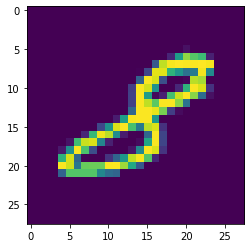

In [20]:
import matplotlib.pyplot as plt

plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)